In [1]:
# Imports and Setup
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import librosa
import IPython.display

# has to be set in order to show the image in notebook
%matplotlib inline 

try:
    os.chdir("./Resources")
except:
    pass

/Library/Python/2.7/site-packages/librosa/core/audio.py:33: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [13]:
y, sr = librosa.load('./single-kick-4.wav', duration=6.3)
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

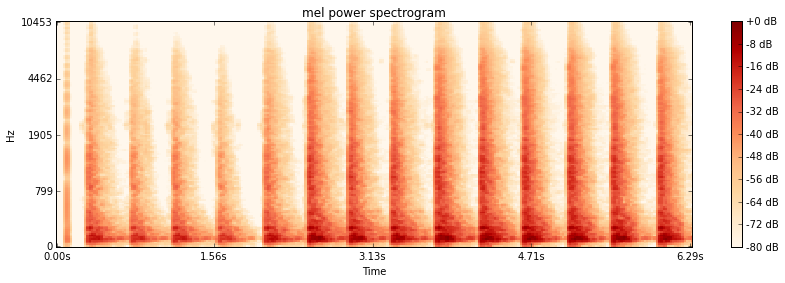

In [14]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

o_env = librosa.onset.onset_strength(y, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [15]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times  = librosa.frames_to_time(onset_frames[:], sr=sr)

(0.0, 273.0, 0.0, 31.77408980924746)

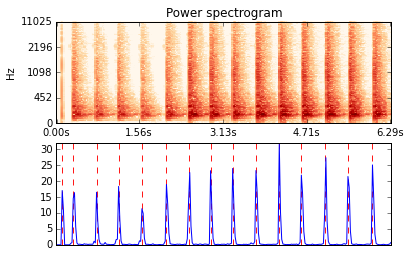

In [16]:
D = np.abs(librosa.stft(y))**2
plt.figure()

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2)
plt.plot(o_env, label='Onset strength')
plt.vlines(onset_frames, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.xticks([])
plt.axis('tight')

In [9]:
onset_stfts = []
for frame in onset_frames:
    print np.abs(D[:, frame])
    onset_stfts.append(np.abs(D[:, frame]))

[ 0.35836396  0.39298913  0.35847309 ...,  0.03190884  0.02569633
  0.00113013]
[  2.95404770e-05   2.21024427e-04   1.17843831e-02 ...,   7.72578991e-04
   1.35431869e-03   3.74682900e-03]
[  4.40181990e-04   7.61234493e-04   1.03685502e-02 ...,   6.36803361e-06
   3.05665685e-06   3.03909047e-07]
[  2.31680770e-06   1.14568451e-04   9.91007499e-03 ...,   8.07217111e-06
   7.40130999e-05   1.46776103e-04]
[  4.33969799e-05   2.91928824e-04   8.32550786e-03 ...,   1.75721907e-05
   1.22531710e-05   4.03284248e-05]
[  3.82769940e-06   3.46470159e-04   7.83557259e-03 ...,   2.75364414e-06
   2.82974397e-05   6.48989371e-05]
[ 0.00034614  0.00028752  0.00598528 ...,  0.00329125  0.0022956
  0.00095727]
[  3.76554355e-02   3.26057002e-02   8.77099782e-02 ...,   5.17089529e-06
   6.79017205e-07   1.02621721e-06]
[  3.74653446e-03   1.63786914e-02   6.66081011e-02 ...,   6.07353832e-05
   5.34613791e-05   4.47011053e-06]
[  1.21272169e-01   9.87546667e-02   1.78521544e-01 ...,   7.23789469e-

In [17]:
filename = raw_input()
with open('../Data/' + filename, 'w+') as f:
    fw = csv.writer(f, delimiter=',')
    
    for i in range(len(onset_frames)):
        # onset_stfts is an array of ndarrays so we need to cast to list
        fw.writerow([onset_frames[i], onset_stfts[i].tolist()]) 

kickDrumFrames4.csv
